In [90]:
#Load dataset and libraries cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
netflix_data=pd.read_csv('netflix1.csv')

In [92]:
netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
netflix_data.shape

(8790, 10)

Netflix dataset has 8790 entries and 10 columns (8790 x 10)

In [5]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

Describing the dataset and its information

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB



As we can see, all the variables (columns) are object type entry, except "release_year" as an integer type. We can also check .describe() method to have more in-depth information

In [7]:
netflix_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [244]:
netflix_data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s5281,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


Checkpoint for missing values in the dataset

In [9]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Unique values of 'type' and 'country' as well as 'release year'

In [21]:
print(netflix_data['type'].unique())
print(netflix_data['type'].value_counts())

['Movie' 'TV Show']
Movie      6126
TV Show    2664
Name: type, dtype: int64


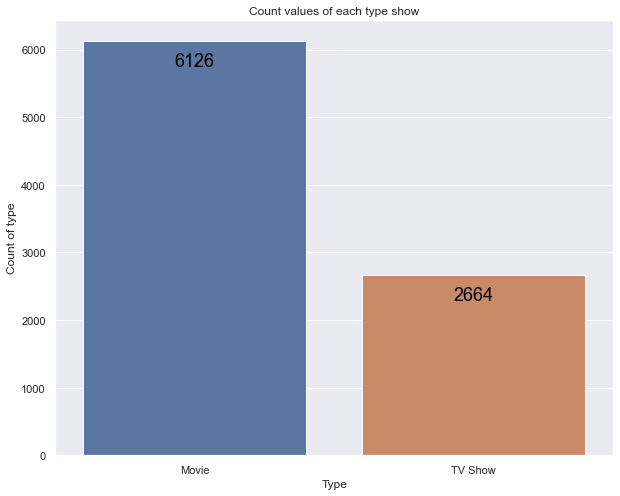

In [249]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
ax=sns.countplot(data=netflix_data, x='type', saturation=0.7)
ax.set_title("Count values of each type show")
ax.set_xlabel('Type')
ax.set_ylabel('Count of type')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+150), ha='center', va='top', color='black', size=18)

In [11]:
netflix_data['country'].sort_values(ascending=True).unique()

array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus',
       'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait',
       'Lebanon', 'Luxembourg', 'Malaysia', 'Mauritius', 'Mexico',
       'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Not Given', 'Pakistan', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Romania',
       'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore',
       'Slovenia', 'Somalia', 'South Africa', 'South Korea',
       'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Syria',
       'Taiwan', 'Thailand', 'Turkey', 'Ukraine'

as we can see, there is an entry in the country column which is 'Not Given', we should find out how many data entry in the country column are 'Not Given' and decide what is most appropriate way to either replace the value with most frequent or neglect 

In [23]:
# Finding number of movies whose country is "Not Given"
print("Number of movies where Country is Not Given: ", len(netflix_data[netflix_data['country'] == "Not Given"]))
# Finding number of countries with the most movies produced
print("Value counts of countries:\n", netflix_data['country'].value_counts())

Number of movies where Country is Not Given:  287
Value counts of countries:
 United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Greece               1
Luxembourg           1
Namibia              1
Cyprus               1
West Germany         1
Name: country, Length: 86, dtype: int64


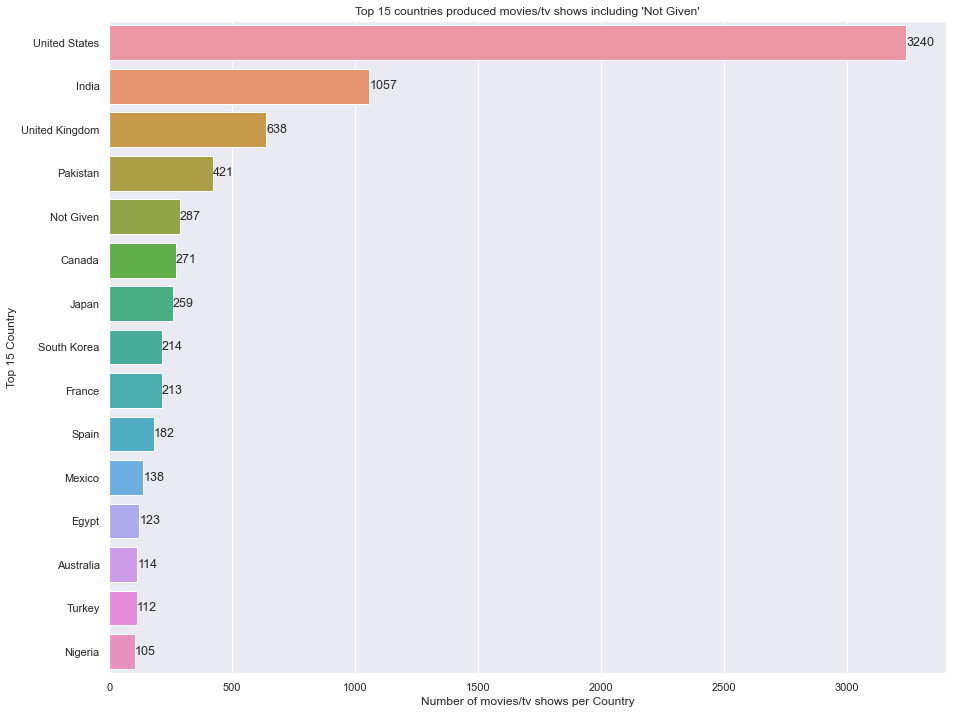

In [251]:
# Visualize top 15 countries of different type shows
plt.figure(figsize=(15,12))
top_15_countries=netflix_data['country'].value_counts().head(15)
ax=sns.barplot(x=top_15_countries.values, y=top_15_countries.index)
ax.set_title("Top 15 countries produced movies/tv shows including 'Not Given'")
ax.set_xlabel('Number of movies/tv shows per Country')
ax.set_ylabel('Top 15 Country')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',   # vertical alignment
            size=12.5)

As we can see from the plot, Countries which are "Not Given" counts to 287 and ranks 5 within the top 15 countries to produce Movies & TV Shows; therefore, I don't think it is wise to exclude it. But if we were to exclude, the below plot shows the new top 15 countries with Germany included as the bottom of the top 15 Countries.

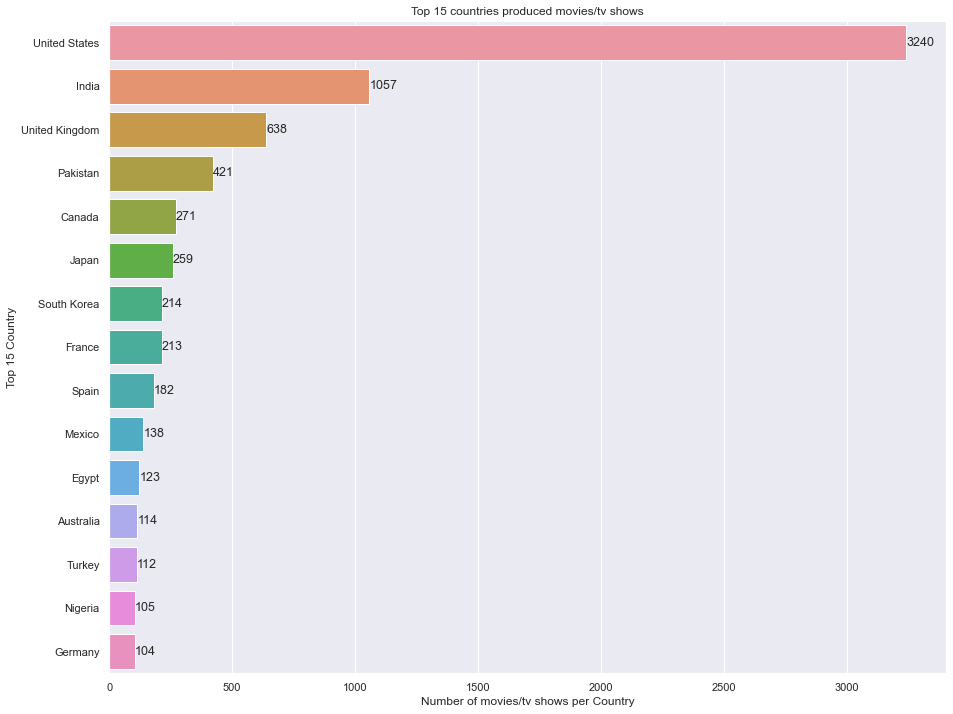

In [252]:
# visualize top 15 countries after dropping (excluding) "Not Given" Countries
plt.figure(figsize=(15,12))
top_15_countries=netflix_data['country'].value_counts().drop('Not Given').head(15)
ax=sns.barplot(x=top_15_countries.values, y=top_15_countries.index)
ax.set_title("Top 15 countries produced movies/tv shows")
ax.set_xlabel('Number of movies/tv shows per Country')
ax.set_ylabel('Top 15 Country')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',   # vertical alignment
            size=12.5)

In [27]:
netflix_data['release_year'].sort_values(ascending=True).unique()

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Text(0, 0.5, 'Count')

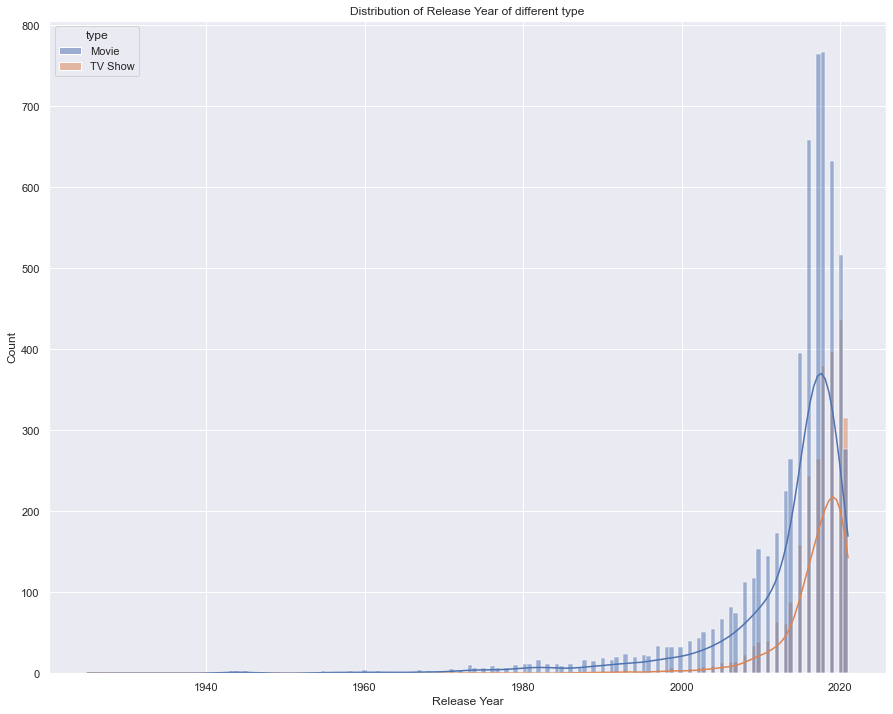

In [254]:
plt.figure(figsize=(15,12))
ax=sns.histplot(data=netflix_data, x='release_year', hue='type', kde=True)
ax.set_title('Distribution of Release Year of different type')
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')

From the above plot, we can comment that TV shows released was more than Movies released after the year 2020

In [71]:
netflix_data['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

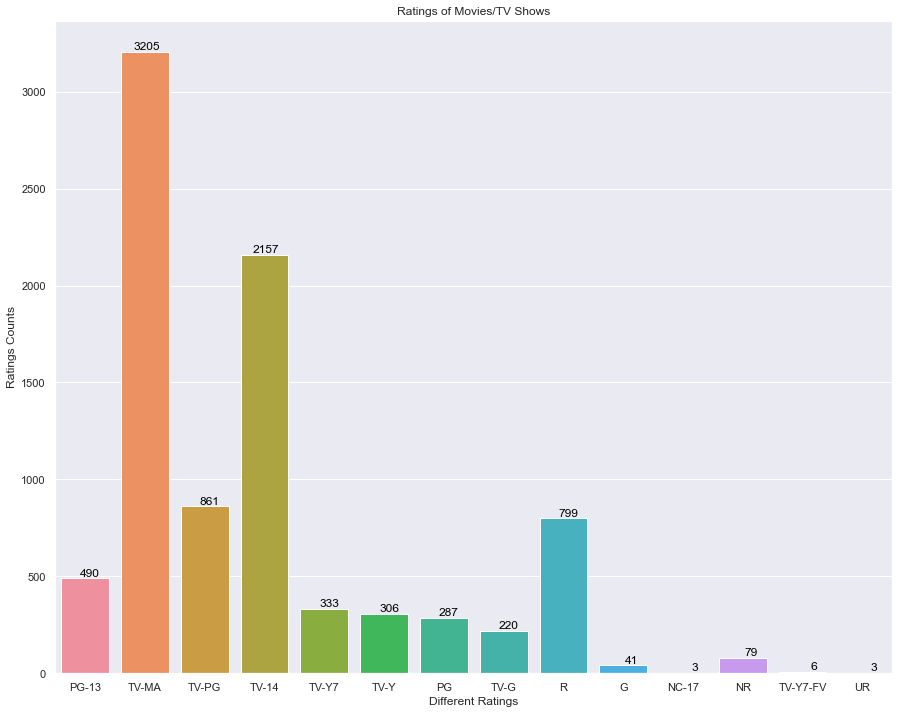

In [255]:
# Distribution of rating of Movies / TV shows
plt.figure(figsize=(15,12))
sns.set_theme(style='darkgrid')
ax=sns.countplot(data=netflix_data, x='rating', saturation=0.85)
ax.set_title("Ratings of Movies/TV Shows")
ax.set_xlabel('Different Ratings')
ax.set_ylabel('Ratings Counts')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.65, p.get_height()), ha='right', va='bottom', color='black', size=12)

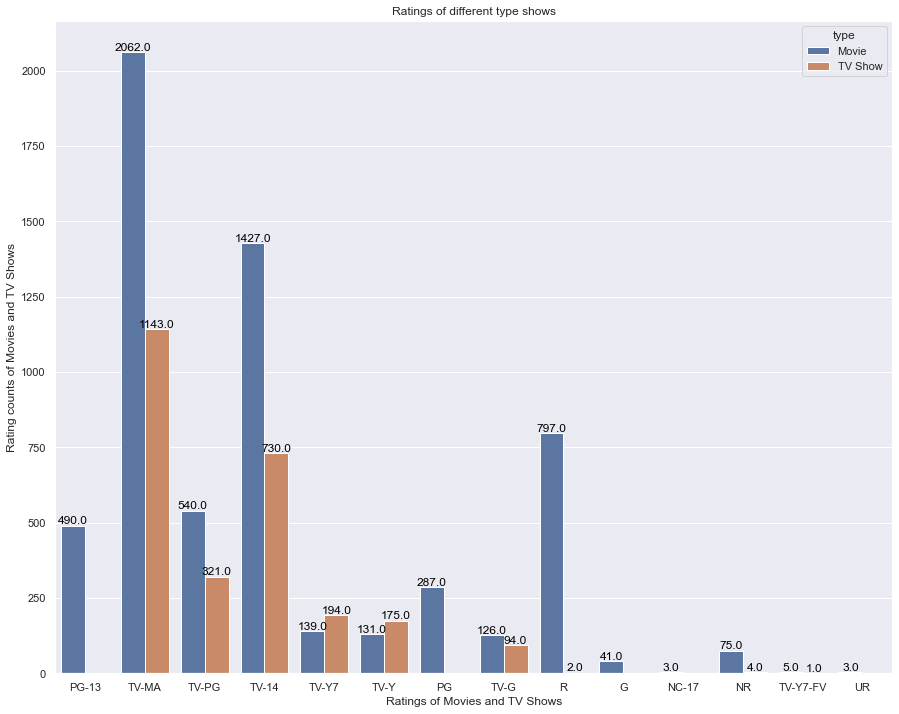

In [256]:
# Distribution of rating of Movies / TV shows and their types
plt.figure(figsize=(15,12))
sns.set_theme(style='darkgrid')
ax=sns.countplot(data=netflix_data, x='rating', saturation=0.7, hue='type')
ax.set_title("Ratings of different type shows")
ax.set_xlabel('Ratings of Movies and TV Shows')
ax.set_ylabel('Rating counts of Movies and TV Shows')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+70), ha='center', va='top', color='black', size=12)

In [233]:
print(netflix_data['listed_in'].value_counts())
print(len(netflix_data['listed_in']))

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Classic & Cult TV, TV Horror, TV Mysteries                       1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International Movies, Romantic Movies, Sci-Fi & Fantasy          1
Action & Adventure, Cult Movies                                  1
Name: listed_in, Length: 513, dtype: int64
8790


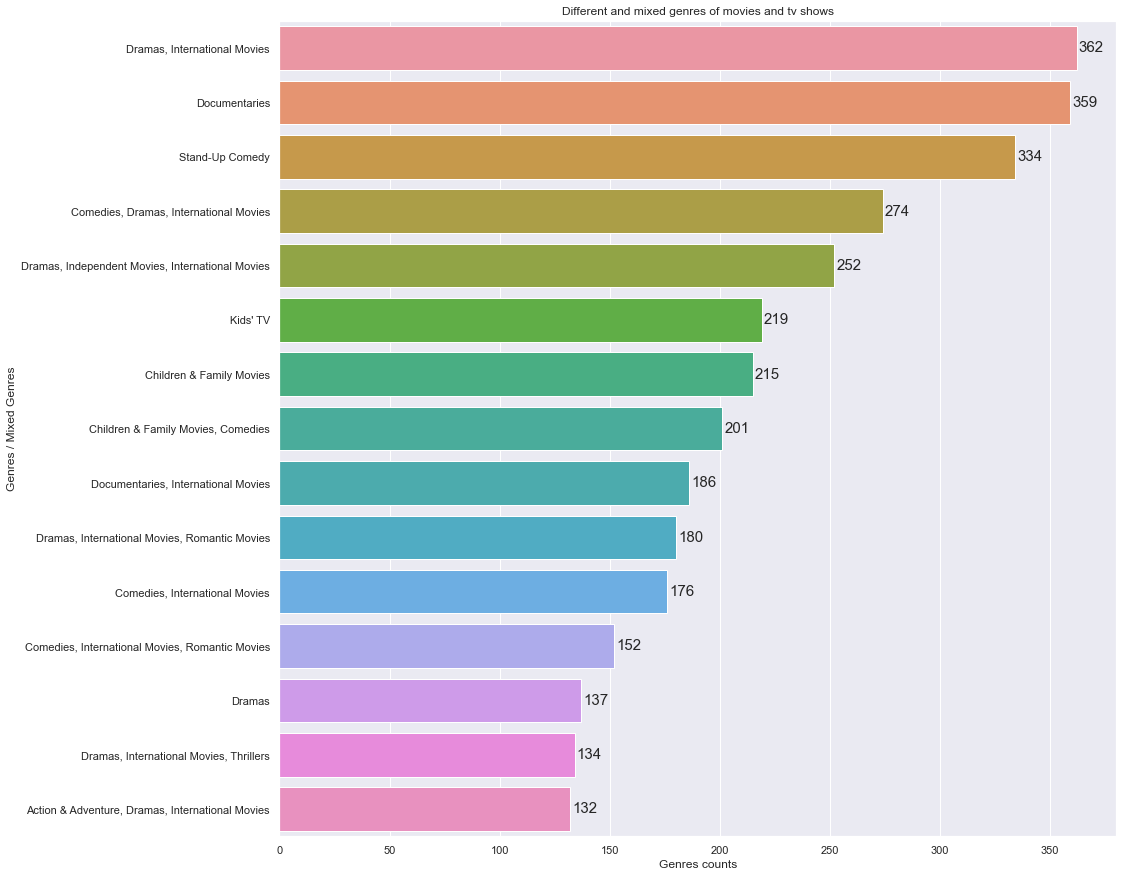

In [257]:
plt.figure(figsize=(15,15))
sns.set_theme(style='darkgrid')
top_15_genres=netflix_data['listed_in'].value_counts().head(15)
ax=sns.barplot(x=top_15_genres.values, y=top_15_genres.index)
ax.set_title("Different and mixed genres of movies and tv shows")
ax.set_xlabel('Genres counts')
ax.set_ylabel('Genres / Mixed Genres')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',   # vertical alignment
            size=15)

In [179]:
# Movies and TV shows released from 2000 and onwards
movies_tvshows_2000s = netflix_data[netflix_data['release_year'] >= 2000 ]
movies_tvshows_2000s.shape

(8265, 10)

In [180]:
movies_tvshows_2000s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8265 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8265 non-null   object
 1   type          8265 non-null   object
 2   title         8265 non-null   object
 3   director      8265 non-null   object
 4   country       8265 non-null   object
 5   date_added    8265 non-null   object
 6   release_year  8265 non-null   int64 
 7   rating        8265 non-null   object
 8   duration      8265 non-null   object
 9   listed_in     8265 non-null   object
dtypes: int64(1), object(9)
memory usage: 710.3+ KB


In [182]:
movies_tvshows_2000s.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8265,8265,8265,8265,8265,8265,8265.000000,8265,8265,8265
unique,8265,2,8262,4275,84,1702,NaN,14,205,467
top,s5281,Movie,22-Jul,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,Documentaries
freq,1,5650,2,2536,2963,78,NaN,3141,1763,353
mean,NaN,NaN,NaN,NaN,NaN,NaN,2015.970236,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.345479,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


Text(0, 0.5, 'Shows Counts')

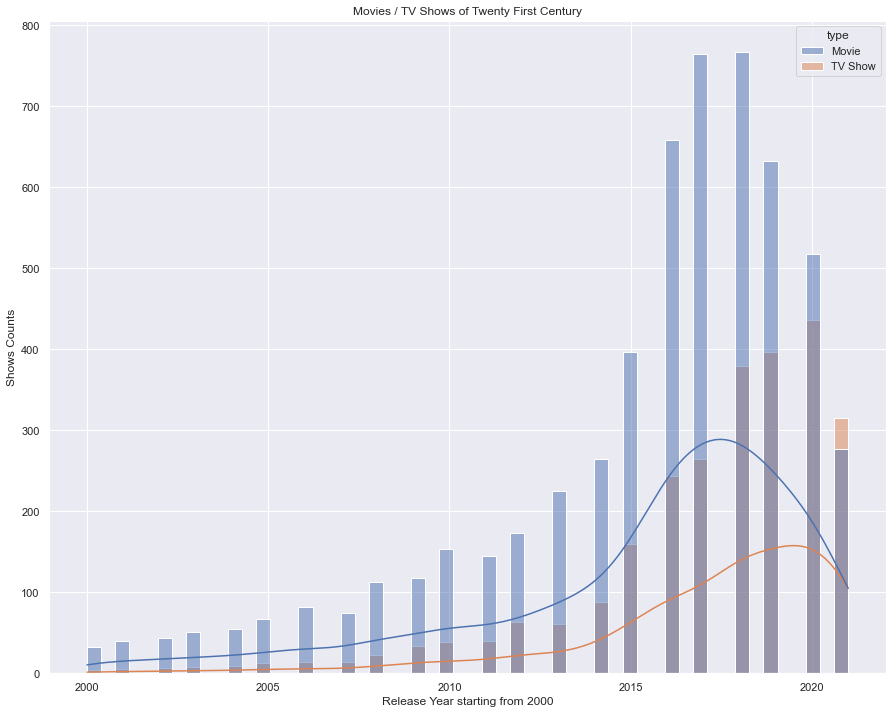

In [258]:
# Now let's compare more between type of shows released between Movies and TV shows
plt.figure(figsize=(15,12))
ax=sns.histplot(data=movies_tvshows_2000s, x='release_year', hue='type', kde=True)
ax.set_title("Movies / TV Shows of Twenty First Century")
ax.set_xlabel('Release Year starting from 2000')
ax.set_ylabel('Shows Counts')

We can see the trend line as it reaches 2021, TV shows are released more than movies.

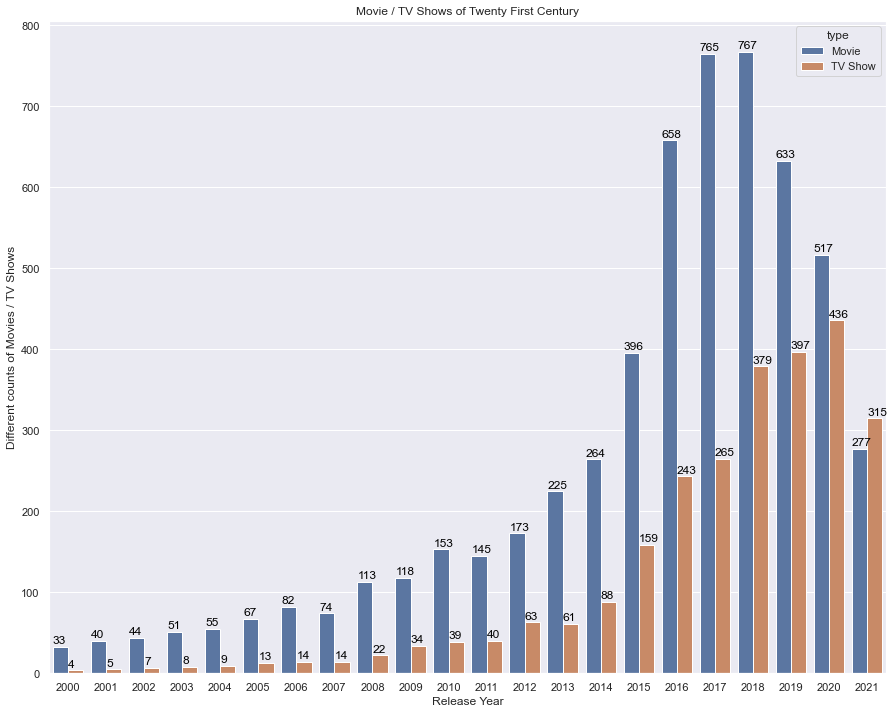

In [260]:
# Distribution of rating of Movies / TV shows and their types of release year since 2000s
plt.figure(figsize=(15,12))
sns.set_theme(style='darkgrid')
ax=sns.countplot(data=movies_tvshows_2000s, x='release_year', saturation=0.7, hue='type')
ax.set_title('Movie / TV Shows of Twenty First Century')
ax.set_xlabel('Release Year')
ax.set_ylabel('Different counts of Movies / TV Shows')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x(), p.get_height()+1), ha='left', va='bottom', color='black', size=12)